In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20, 10)

In [74]:
df = pd.read_csv(r"C:\Users\rahul\pandas\Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [75]:
df.shape

(13320, 9)

In [76]:
df.groupby("area_type")["area_type"].count()

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [77]:
(df.isnull().sum())/len(df)*100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [78]:
df1 = df.drop("society", axis="columns")

In [79]:
df1.isnull().sum()

area_type         0
availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

In [80]:
df1["bath"].fillna(df1["bath"].median(), inplace=True)

In [81]:
df1.isnull().sum()

area_type         0
availability      0
location          1
size             16
total_sqft        0
bath              0
balcony         609
price             0
dtype: int64

In [82]:
df1["balcony"].fillna(df1["balcony"].median(), inplace=True)
df1.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath             0
balcony          0
price            0
dtype: int64

In [83]:
df2 = df1.dropna()

In [84]:
df2.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [85]:
df2["bhk"] = df2["size"].apply(lambda x: int(x.split(" ")[0]))

C:\Users\rahul\AppData\Local\Temp/ipykernel_2036/1652976565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["bhk"] = df2["size"].apply(lambda x: int(x.split(" ")[0]))


In [86]:
df2.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [87]:
df2["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [88]:
def in_range(x):
    tokens = x.split("-")
    if len(tokens) == 2:
        return((float(tokens[0]) + float(tokens[1]))/2)
    try:
        return float(x)
    except:
        return x

In [89]:
df3 = df2.copy()

In [90]:
df3["total_sqft"] = df3["total_sqft"].apply(in_range)

In [91]:
df4 = df3.copy()

In [92]:
df3["str"] = df3["total_sqft"].str.isnumeric()

In [93]:
try_convert = df3[df3.str == False]

In [94]:
try_convert["sqmtr_bool"] = try_convert["total_sqft"].str.contains("Sq. Meter")

C:\Users\rahul\AppData\Local\Temp/ipykernel_2036/3676576038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  try_convert["sqmtr_bool"] = try_convert["total_sqft"].str.contains("Sq. Meter")


In [95]:
sqmtr = try_convert[try_convert.sqmtr_bool == True]

In [96]:
sqmtr["total_sqft"] = round((sqmtr["total_sqft"].str[:-9].astype(float))* 10.76391, 2)

C:\Users\rahul\AppData\Local\Temp/ipykernel_2036/3665531172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sqmtr["total_sqft"] = round((sqmtr["total_sqft"].str[:-9].astype(float))* 10.76391, 2)


In [97]:
sqmtr.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,str,sqmtr_bool
410,Super built-up Area,Ready To Move,Kengeri,1 BHK,370.92,1.0,0.0,18.5,1,False,True
775,Built-up Area,Ready To Move,Basavanagara,1 BHK,10763.91,2.0,1.0,93.0,1,False,True
1400,Super built-up Area,Ready To Move,Chamrajpet,9 BHK,7706.96,9.0,1.0,296.0,9,False,True
1712,Plot Area,Ready To Move,Singena Agrahara,3 Bedroom,16145.86,3.0,1.0,95.0,3,False,True
1743,Super built-up Area,19-Mar,Hosa Road,3 BHK,1535.04,3.0,1.0,115.0,3,False,True


In [98]:
pd.set_option("max_rows", None)

In [99]:
try_convert.shape

(46, 11)

In [100]:
try_convert["sqyards_bool"] = try_convert["total_sqft"].str.contains("Sq. Yards")

sq_yards = try_convert[try_convert.sqyards_bool == True]

sq_yards["total_sqft"] = round((sq_yards["total_sqft"].str[:-9].astype(float))* 9, 2)

sq_yards.head()

C:\Users\rahul\AppData\Local\Temp/ipykernel_2036/3733835024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  try_convert["sqyards_bool"] = try_convert["total_sqft"].str.contains("Sq. Yards")
C:\Users\rahul\AppData\Local\Temp/ipykernel_2036/3733835024.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sq_yards["total_sqft"] = round((sq_yards["total_sqft"].str[:-9].astype(float))* 9, 2)


,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,str,sqmtr_bool,sqyards_bool
872,Super built-up Area,Ready To Move,Singapura Village,2 BHK,9900.00,2.0,2.0,45.0,2,False,False,True
1821,Plot Area,Ready To Move,Sarjapur,3 Bedroom,14166.00,3.0,1.0,76.0,3,False,False,True
2310,Super built-up Area,Ready To Move,Whitefield,4 BHK,3251.97,4.0,2.0,270.0,4,False,False,True
2881,Built-up Area,Ready To Move,Volagerekallahalli,2 BHK,1053.00,2.0,2.0,38.0,2,False,False,True
3285,Plot Area,18-May,Whitefield,4 Bedroom,4500.00,4.0,2.0,378.0,4,False,False,True


In [101]:
try_convert["acres_bool"] = try_convert["total_sqft"].str.contains("Acres")

acres = try_convert[try_convert.acres_bool == True]

acres["total_sqft"] = round((acres["total_sqft"].str[:-5].astype(float))* 43560, 2)

acres.head()

C:\Users\rahul\AppData\Local\Temp/ipykernel_2036/2484738464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  try_convert["acres_bool"] = try_convert["total_sqft"].str.contains("Acres")
C:\Users\rahul\AppData\Local\Temp/ipykernel_2036/2484738464.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acres["total_sqft"] = round((acres["total_sqft"].str[:-5].astype(float))* 43560, 2)


,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,str,sqmtr_bool,sqyards_bool,acres_bool
1019,Plot Area,18-Mar,Marathi Layout,1 Bedroom,231303.6,1.0,0.0,110.0,1,False,False,False,True
1086,Plot Area,19-Mar,Narasapura,2 Bedroom,1306800.0,2.0,2.0,29.5,2,False,False,False,True
6333,Plot Area,Ready To Move,Harohalli,2 Bedroom,91040.4,2.0,0.0,200.0,2,False,False,False,True
7334,Plot Area,Ready To Move,Kanakpura Road,1 Bedroom,87120.0,1.0,0.0,125.0,1,False,False,False,True
7607,Plot Area,Ready To Move,Bommenahalli,3 Bedroom,653400.0,3.0,1.0,217.0,3,False,False,False,True


In [102]:
try_convert.loc[648, "total_sqft"] = 272.25*4125

c:\users\rahul\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [103]:
try_convert.loc[648]

area_type       Built-up  Area
availability     Ready To Move
location               Arekere
size                 9 Bedroom
total_sqft          1123031.25
bath                       9.0
balcony                    2.0
price                    265.0
bhk                          9
str                      False
sqmtr_bool               False
sqyards_bool             False
acres_bool               False
Name: 648, dtype: object

In [104]:
try_convert["total_sqft"].str.contains("Cents").head()

410     False
648       NaN
775     False
872     False
1019    False
Name: total_sqft, dtype: object

In [105]:
try_convert.loc[5453, "total_sqft"] = 3*435.56
try_convert.loc[7001, "total_sqft"] = 3*1500

In [106]:
try_convert["total_sqft"].str.contains("Guntha").value_counts()

False    41
True      2
Name: total_sqft, dtype: int64

In [107]:
try_convert.loc[6552, "total_sqft"] = 24*1089
try_convert.loc[11320, "total_sqft"] = 38*1089

In [108]:
try_convert.loc[6552]

area_type                                Plot  Area
availability                          Ready To Move
location        5 Bedroom Farm House in Lakshmipura
size                                      5 Bedroom
total_sqft                                    26136
bath                                            6.0
balcony                                         2.0
price                                         550.0
bhk                                               5
str                                           False
sqmtr_bool                                    False
sqyards_bool                                  False
acres_bool                                    False
Name: 6552, dtype: object

In [109]:
try_convert.loc[9423, "total_sqft"] = 2400.35 

In [110]:
try_convert.loc[9423]

area_type             Plot  Area
availability       Ready To Move
location        Ramamurthy Nagar
size                   1 Bedroom
total_sqft               2400.35
bath                         1.0
balcony                      1.0
price                       48.0
bhk                            1
str                        False
sqmtr_bool                 False
sqyards_bool               False
acres_bool                 False
Name: 9423, dtype: object

In [111]:
converted_values = pd.concat([sqmtr, sq_yards, acres, try_convert])

In [112]:
converted_values.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,str,sqmtr_bool,sqyards_bool,acres_bool
410,Super built-up Area,Ready To Move,Kengeri,1 BHK,370.92,1.0,0.0,18.5,1,False,True,NaN,NaN
775,Built-up Area,Ready To Move,Basavanagara,1 BHK,10763.91,2.0,1.0,93.0,1,False,True,NaN,NaN
1400,Super built-up Area,Ready To Move,Chamrajpet,9 BHK,7706.96,9.0,1.0,296.0,9,False,True,NaN,NaN
1712,Plot Area,Ready To Move,Singena Agrahara,3 Bedroom,16145.86,3.0,1.0,95.0,3,False,True,NaN,NaN
1743,Super built-up Area,19-Mar,Hosa Road,3 BHK,1535.04,3.0,1.0,115.0,3,False,True,NaN,NaN


In [113]:
type(converted_values.loc[5453, "total_sqft"])

float

In [114]:
converted_values["values"] = converted_values.total_sqft.str.isnumeric()

In [115]:
converted_values["values"] = converted_values["values"].replace(np.NaN, True)

In [116]:
converted_values.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,str,sqmtr_bool,sqyards_bool,acres_bool,values
410,Super built-up Area,Ready To Move,Kengeri,1 BHK,370.92,1.0,0.0,18.5,1,False,True,NaN,NaN,True
775,Built-up Area,Ready To Move,Basavanagara,1 BHK,10763.91,2.0,1.0,93.0,1,False,True,NaN,NaN,True
1400,Super built-up Area,Ready To Move,Chamrajpet,9 BHK,7706.96,9.0,1.0,296.0,9,False,True,NaN,NaN,True
1712,Plot Area,Ready To Move,Singena Agrahara,3 Bedroom,16145.86,3.0,1.0,95.0,3,False,True,NaN,NaN,True
1743,Super built-up Area,19-Mar,Hosa Road,3 BHK,1535.04,3.0,1.0,115.0,3,False,True,NaN,NaN,True


In [117]:
converted = converted_values[converted_values["values"] == True]

In [118]:
converted.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,str,sqmtr_bool,sqyards_bool,acres_bool,values
410,Super built-up Area,Ready To Move,Kengeri,1 BHK,370.92,1.0,0.0,18.5,1,False,True,NaN,NaN,True
775,Built-up Area,Ready To Move,Basavanagara,1 BHK,10763.91,2.0,1.0,93.0,1,False,True,NaN,NaN,True
1400,Super built-up Area,Ready To Move,Chamrajpet,9 BHK,7706.96,9.0,1.0,296.0,9,False,True,NaN,NaN,True
1712,Plot Area,Ready To Move,Singena Agrahara,3 Bedroom,16145.86,3.0,1.0,95.0,3,False,True,NaN,NaN,True
1743,Super built-up Area,19-Mar,Hosa Road,3 BHK,1535.04,3.0,1.0,115.0,3,False,True,NaN,NaN,True


In [119]:
final_convert = converted.drop(["str", "sqmtr_bool", "sqyards_bool", "acres_bool", "values"], axis="columns")

In [120]:
df5 = pd.concat([final_convert, df4])

In [121]:
type(df5.loc[410, "total_sqft"])

pandas.core.series.Series

In [122]:
df5.loc[410, "total_sqft"]

410            370.92
410    34.46Sq. Meter
Name: total_sqft, dtype: object

In [123]:
df5["bool"]= df5["total_sqft"].str.isnumeric()

In [124]:
df5.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,bool
410,Super built-up Area,Ready To Move,Kengeri,1 BHK,370.92,1.0,0.0,18.5,1,NaN
775,Built-up Area,Ready To Move,Basavanagara,1 BHK,10763.91,2.0,1.0,93.0,1,NaN
1400,Super built-up Area,Ready To Move,Chamrajpet,9 BHK,7706.96,9.0,1.0,296.0,9,NaN
1712,Plot Area,Ready To Move,Singena Agrahara,3 Bedroom,16145.86,3.0,1.0,95.0,3,NaN
1743,Super built-up Area,19-Mar,Hosa Road,3 BHK,1535.04,3.0,1.0,115.0,3,NaN


In [125]:
df5["bool"] = df5["bool"].replace(np.NaN, True)

In [126]:
df5.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,bool
410,Super built-up Area,Ready To Move,Kengeri,1 BHK,370.92,1.0,0.0,18.5,1,True
775,Built-up Area,Ready To Move,Basavanagara,1 BHK,10763.91,2.0,1.0,93.0,1,True
1400,Super built-up Area,Ready To Move,Chamrajpet,9 BHK,7706.96,9.0,1.0,296.0,9,True
1712,Plot Area,Ready To Move,Singena Agrahara,3 Bedroom,16145.86,3.0,1.0,95.0,3,True
1743,Super built-up Area,19-Mar,Hosa Road,3 BHK,1535.04,3.0,1.0,115.0,3,True


In [127]:
df6 = df5[df5["bool"] == True]

In [128]:
df6.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,bool
410,Super built-up Area,Ready To Move,Kengeri,1 BHK,370.92,1.0,0.0,18.5,1,True
775,Built-up Area,Ready To Move,Basavanagara,1 BHK,10763.91,2.0,1.0,93.0,1,True
1400,Super built-up Area,Ready To Move,Chamrajpet,9 BHK,7706.96,9.0,1.0,296.0,9,True
1712,Plot Area,Ready To Move,Singena Agrahara,3 Bedroom,16145.86,3.0,1.0,95.0,3,True
1743,Super built-up Area,19-Mar,Hosa Road,3 BHK,1535.04,3.0,1.0,115.0,3,True


In [129]:
df7 = df6.drop("bool", axis="columns")

In [130]:
df7.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
410,Super built-up Area,Ready To Move,Kengeri,1 BHK,370.92,1.0,0.0,18.5,1
775,Built-up Area,Ready To Move,Basavanagara,1 BHK,10763.91,2.0,1.0,93.0,1
1400,Super built-up Area,Ready To Move,Chamrajpet,9 BHK,7706.96,9.0,1.0,296.0,9
1712,Plot Area,Ready To Move,Singena Agrahara,3 Bedroom,16145.86,3.0,1.0,95.0,3
1743,Super built-up Area,19-Mar,Hosa Road,3 BHK,1535.04,3.0,1.0,115.0,3


In [131]:
df7["price/sqft"] = round((((df7["price"]* 100000)/df7["total_sqft"]).astype(float)), 2)

In [132]:
df7.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price/sqft
410,Super built-up Area,Ready To Move,Kengeri,1 BHK,370.92,1.0,0.0,18.5,1,4987.60
775,Built-up Area,Ready To Move,Basavanagara,1 BHK,10763.91,2.0,1.0,93.0,1,864.00
1400,Super built-up Area,Ready To Move,Chamrajpet,9 BHK,7706.96,9.0,1.0,296.0,9,3840.68
1712,Plot Area,Ready To Move,Singena Agrahara,3 Bedroom,16145.86,3.0,1.0,95.0,3,588.39
1743,Super built-up Area,19-Mar,Hosa Road,3 BHK,1535.04,3.0,1.0,115.0,3,7491.66


In [133]:
len(df7["location"].unique())

1304

In [134]:
df7["location"] = df7["location"].apply(lambda x: x.strip())
loc_stat = df7.groupby("location")["location"].count().sort_values(ascending=False)
loc_stat.head()

location
Whitefield         540
Sarjapur  Road     397
Electronic City    304
Kanakpura Road     273
Thanisandra        237
Name: location, dtype: int64

In [135]:
len(loc_stat[loc_stat <= 10])

1052

In [136]:
loc_data_less_then_10 = loc_stat[loc_stat <= 10]

In [137]:
len(df7["location"].unique())

1293

In [138]:
df7["location"] = df7["location"].apply(lambda x: "other" if x in loc_data_less_then_10 else x)

In [139]:
len(df7["location"].unique())

242

In [140]:
df7.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price/sqft
410,Super built-up Area,Ready To Move,Kengeri,1 BHK,370.92,1.0,0.0,18.5,1,4987.60
775,Built-up Area,Ready To Move,other,1 BHK,10763.91,2.0,1.0,93.0,1,864.00
1400,Super built-up Area,Ready To Move,Chamrajpet,9 BHK,7706.96,9.0,1.0,296.0,9,3840.68
1712,Plot Area,Ready To Move,other,3 Bedroom,16145.86,3.0,1.0,95.0,3,588.39
1743,Super built-up Area,19-Mar,Hosa Road,3 BHK,1535.04,3.0,1.0,115.0,3,7491.66


In [141]:
df8 = df7[df7["total_sqft"]/df7["bhk"] > 300]

In [142]:
df8.shape

(12373, 10)

In [143]:
df8.describe()

,bath,balcony,price,bhk,price/sqft
count,12373.000000,12373.000000,12373.000000,12373.000000,12373.000000
mean,2.544250,1.604785,110.945613,2.635093,6202.395608
std,1.069634,0.795914,152.708268,0.969776,4047.081692
min,1.000000,0.000000,9.000000,1.000000,2.260000
25%,2.000000,1.000000,49.000000,2.000000,4200.000000
50%,2.000000,2.000000,69.610000,3.000000,5263.160000
75%,3.000000,2.000000,115.000000,3.000000,6827.790000
max,16.000000,3.000000,3600.000000,16.000000,176470.590000


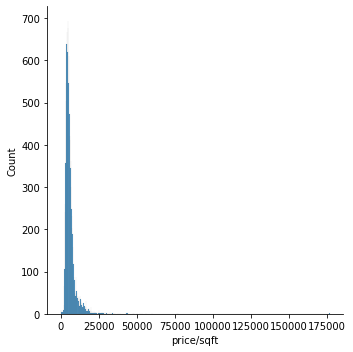

In [144]:
import seaborn as sns
sns.displot(df8["price/sqft"])
plt.show()

In [145]:
def outliers(df):
    df_op = pd.DataFrame()
    for i, j in df8.groupby("location"):
        mean = j["price/sqft"].mean()
        std = j["price/sqft"].std()
        red_df = j[(j["price/sqft"] > (mean - std)) & (j["price/sqft"] <= (mean+std))]
        df_op = pd.concat([df_op, red_df], ignore_index=True)
    return(df_op)

In [146]:
df9 = outliers(df8)

In [147]:
def scatter_plot(df, location):
    _2bhk = df[(df["location"] == location) & (df["bhk"] == 2)]
    _3bhk = df[(df["location"] == location) & (df["bhk"] == 3)]
    matplotlib.rcParams["figure.figsize"] = (15, 10)
    plt.scatter(_2bhk["total_sqft"], _2bhk["price"], label="2bhk", s=50)
    plt.scatter(_3bhk["total_sqft"], _3bhk["price"], marker="*", label="3bhk", s=50)
    plt.title(location)
    plt.xlabel("total sqft")
    plt.legend()
    plt.ylabel("price/sqft")
    plt.show()

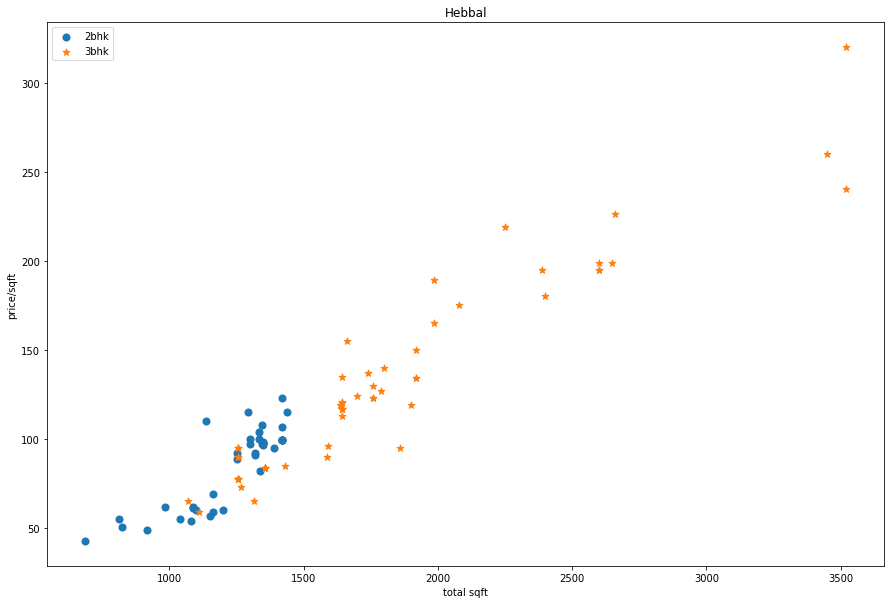

In [148]:
scatter_plot(df9, "Hebbal")

In [149]:
def outlier_removal(df):
    exclude = np.array([])
    for i, j in df.groupby("location"):
        stats = {}
        for k, l in df.groupby("bhk"):
            stats[k] = {
                "mean": l["price/sqft"].mean(),
                "std": l["price/sqft"].std(),
                "count": l.shape[0] 
            }
        for k, l in df.groupby("bhk"):
            stat = stats.get(k-1)
            if stat and stat["count"]>5:
                exclude = np.append(exclude, l[l["price/sqft"] < (stat["mean"])].index.values)
        return df.drop(exclude, axis="index")

In [150]:
df10 = outlier_removal(df9)
df10.shape

(5270, 10)

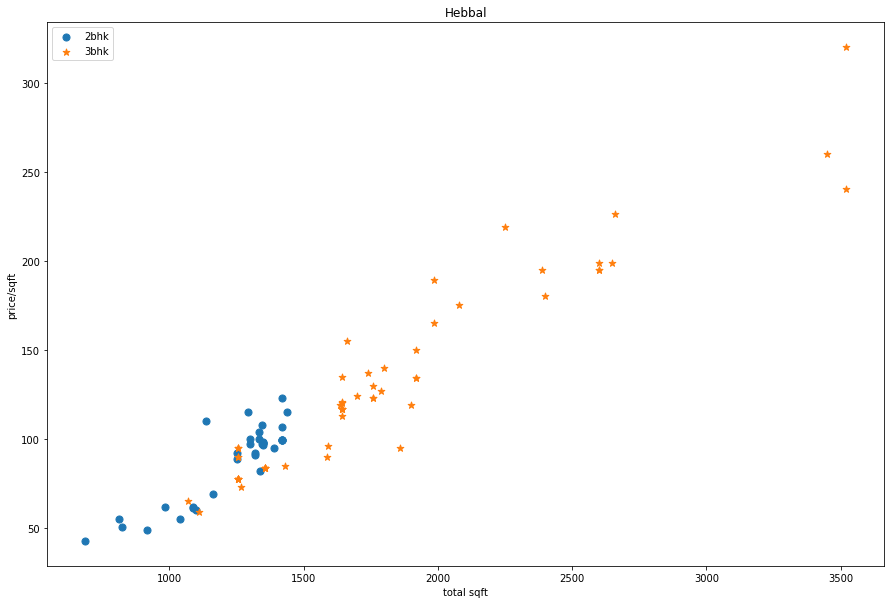

In [151]:
scatter_plot(df10, "Hebbal")

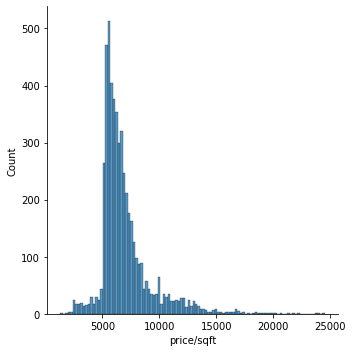

In [152]:
sns.displot(df10["price/sqft"])
plt.show()

In [153]:
df10["bath"].unique()

array([ 4.,  3.,  2.,  1.,  5.,  8.,  6.,  7.,  9., 16., 12., 13.])

In [154]:
df10[df10["bath"] > 10]

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price/sqft
8507,Super built-up Area,Ready To Move,other,16 BHK,10000.0,16.0,2.0,550.0,16,5500.00
9220,Super built-up Area,Ready To Move,other,11 BHK,6000.0,12.0,2.0,150.0,11,2500.00
9545,Super built-up Area,Ready To Move,other,13 BHK,5425.0,13.0,0.0,275.0,13,5069.12


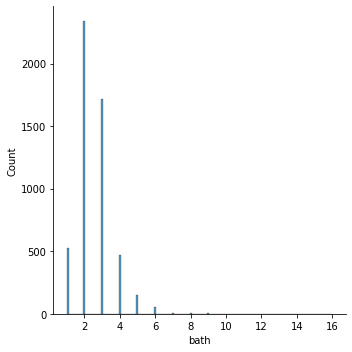

In [155]:
sns.displot(df10["bath"])
plt.show()

In [156]:
df10[df10["bath"] > df10["bath"]+1]

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price/sqft


In [157]:
df10.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price/sqft
0,Super built-up Area,20-May,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.0,4,15017.54
1,Super built-up Area,18-Jun,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.0,3,11901.84
2,Super built-up Area,Ready To Move,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.0,3,12533.33
3,Built-up Area,15-Dec,1st Block Jayanagar,3 BHK,1200.0,2.0,0.0,130.0,3,10833.33
4,Super built-up Area,18-Jun,1st Block Jayanagar,2 BHK,1235.0,2.0,2.0,148.0,2,11983.81


In [158]:
df11 = df10.drop(["price/sqft", "size", "availability"], axis="columns")

In [159]:
df11.head()

,area_type,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
3,Built-up Area,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3
4,Super built-up Area,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2


In [160]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df11["n_area_type"] = le.fit_transform(df11["area_type"])

In [161]:
df11["n_location"] = le.fit_transform(df11["location"])
df11.head()

,area_type,location,total_sqft,bath,balcony,price,bhk,n_area_type,n_location
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,3,0
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,3,0
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,3,0
3,Built-up Area,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,0,0
4,Super built-up Area,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,3,0


In [162]:
df12 = df11.drop(["area_type", "location"], axis="columns")
df12.head()

,total_sqft,bath,balcony,price,bhk,n_area_type,n_location
0,2850.0,4.0,1.0,428.0,4,3,0
1,1630.0,3.0,2.0,194.0,3,3,0
2,1875.0,2.0,3.0,235.0,3,3,0
3,1200.0,2.0,0.0,130.0,3,0,0
4,1235.0,2.0,2.0,148.0,2,3,0


In [163]:
df12.shape

(5270, 7)

In [164]:
X = df12.drop(["price", "n_area_type"], axis="columns")
y = df12["price"]

In [165]:
X.head()

,total_sqft,bath,balcony,bhk,n_location
0,2850.0,4.0,1.0,4,0
1,1630.0,3.0,2.0,3,0
2,1875.0,2.0,3.0,3,0
3,1200.0,2.0,0.0,3,0
4,1235.0,2.0,2.0,2,0


In [166]:
X["total_sqft"] = X["total_sqft"].astype(int)
X["bath"] = X["bath"].astype(int)
X["balcony"] = X["balcony"].astype(int)

In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [168]:
from sklearn.model_selection import cross_val_score, ShuffleSplit, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso
cv = ShuffleSplit(n_splits=5, test_size=0.5)
cross_val_score(LinearRegression(), X, y, cv=cv).mean()

0.7298232606934679

In [169]:
from sklearn.tree import DecisionTreeRegressor

In [170]:
def find_method(X, y):
    algo= {
        "linear regression": {
            "model": LinearRegression(),
            "params": {}
        },
        "lasso": {
            "model": Lasso(),
            "params": {
                "alpha": [1, 2],
                "selection": ["random", "cyclic"]
            }
        },
        "decision_tree": {
            "model": DecisionTreeRegressor(),
            "params": {
                "criterion": ["squared_error", "friedman_mse"],
                "splitter": ["best", "random"]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2)
    for algo_name, config in algo.items():
        gs = GridSearchCV(config["model"], config["params"], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            "model": algo_name,
            "best_score": gs.best_score_,
            "best_params": gs.best_params_
        })
        table = pd.DataFrame(scores, columns=["model", "best_score", "best_params"])
    return table

In [171]:
find_method(X, y)

,model,best_score,best_params
0,linear regression,0.738314,{}
1,lasso,0.726757,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.687006,"{'criterion': 'squared_error', 'splitter': 'be..."


In [172]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [173]:
model.score(X_test, y_test)

0.7273970089530999

In [174]:
model.predict([[2850, 4, 1, 4, 190]])

c:\users\rahul\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([239.84839709])

In [175]:
model.predict([[2000, 4, 1, 2, 190]])

c:\users\rahul\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([168.06518191])

In [179]:
model.score(X_test, y_test)

0.7273970089530999